In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from FinalProject import *

### Identifying the Planaria Shape in Images

* This code will display the results of identifying the Planaria Shape in images

thresholded image1


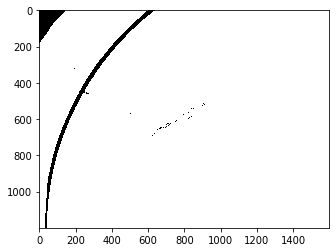

opening the image


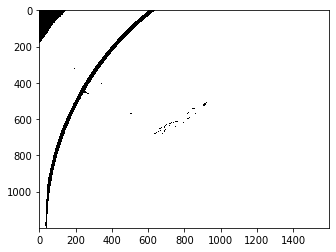

dilating the imaage


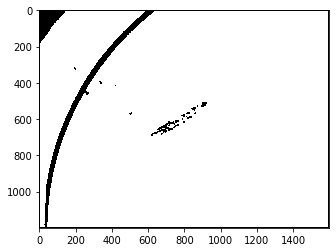

Image 2 of Planaria


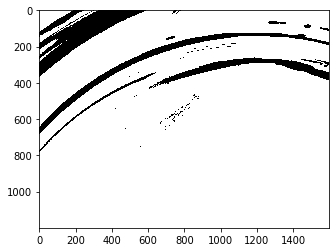

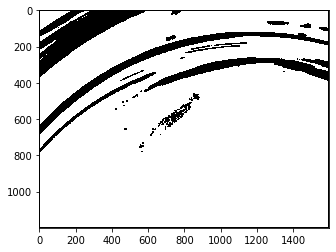

Image 3 of Planaria


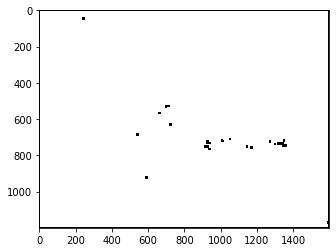

Image 4 of Planaria


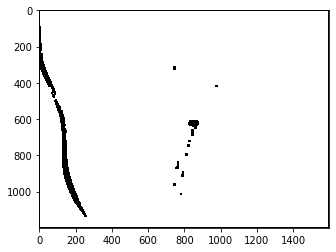

Image 5 of Planaria


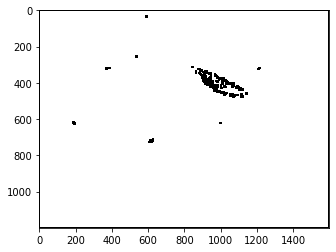

In [14]:
img1 = plt.imread('../FinalProject/images/planaria1.TIF')
img2 = plt.imread('../FinalProject/images/planaria2.TIF')
img3 = plt.imread('../FinalProject/images/planaria3.TIF')
img4 = plt.imread('../FinalProject/images/planaria4.TIF')
img5 = plt.imread('../FinalProject/images/planaria5.TIF')


grayImage1 = convertToGrayScale(img1)
grayImage2 = convertToGrayScale(img2)
grayImage3 = convertToGrayScale(img3)
grayImage4 = convertToGrayScale(img4)
grayImage5 = convertToGrayScale(img5)
th = threshold(grayImage1)
th2 = threshold(grayImage2)
th3 = threshold(grayImage3)
th4 = threshold(grayImage4)
th5 = threshold(grayImage5)

# contours = findContour(grayImage1)

dilate = morph_dilate(th, 9)
erode = morph_erosion(th, 3)
open1 = morph_open(th)
close1 = morph_close(th)

dilate2 = morph_dilate(th2, 2)
erode2 = morph_erosion(th2, 3)
open2 = morph_open(th2)
close2 = morph_close(th2)

erode3 = morph_erosion(th3, 6)

erode4 = morph_erosion(th4, 6)

erode5 = morph_erosion(th5, 6)

print("thresholded image1")
plt.imshow(th, cmap='gray')
plt.show()

print('opening the image')
plt.imshow(open1, cmap='gray')
plt.show()

print('dilating the imaage')
plt.imshow(erode, cmap='gray')
plt.show()

print('Image 2 of Planaria')
plt.imshow(th2, cmap='gray')
plt.show()

plt.imshow(erode2, cmap='gray')
plt.show()

print('Image 3 of Planaria')
plt.imshow(erode3, cmap='gray')
plt.show()

print('Image 4 of Planaria')
plt.imshow(erode4, cmap='gray')
plt.show()

print('Image 5 of Planaria')
plt.imshow(erode5, cmap='gray')
plt.show()

The above images are the results of my exploration of dilating, eroding, opening and closing images of the planaria and how it affects the image. Now I'll move onto trying to figure out how to combine all of those to create an ideal image to setup for finding the contours of the planaria.

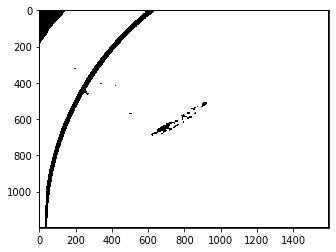

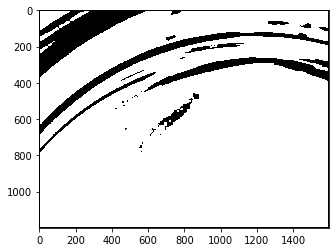

In [16]:
combination1 = combo(img1)
combination2 = combo(img2)
combination3 = combo(img3)
combination4 = combo(img4)
combination5 = combo(img5)

plt.imshow(combination1, cmap='gray')
plt.show()

plt.imshow(combination2, cmap='gray')
plt.show()

With the combination function that I made, I messed around with the kernel sizes and the different functions that I had at my disposal and came to conclusion that grayscaling, thresholding eroding and opening twice does a really great job of defining the planaria's shape despite the bowl's appearance.

Knowing this, what seemed like a great solution to finding the planaria's shape and size, I decided to try to run this on a few other planaria images...

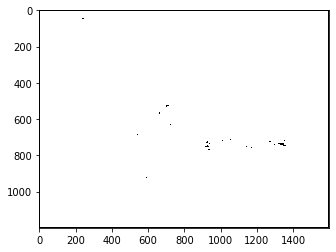

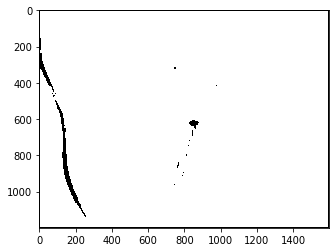

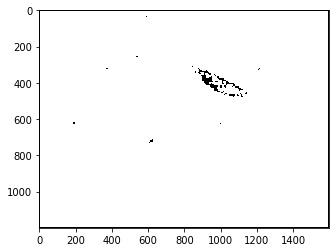

In [17]:
plt.imshow(combination3, cmap='gray')
plt.show()

plt.imshow(combination4, cmap='gray')
plt.show()

plt.imshow(combination5, cmap='gray')
plt.show()

And of course, not to my surprise, it seems as though my idea of an optimal combination of functions does not quite work with some of these images. With the first two, it's really difficult to tell where the planaria(s) is/are and how many there are in the image. However, that being said, it looks like maybe I could use this combination function to help me identify where the head of the planaria is in a few of these images (images 2 and 4). However, it'd be impossible to generalize as there are so many images of the planaria that it wouldn't be consistent. 

### Finding the contours of the shapes in Images

* This code will display the contour lines around the shapes in images

In [18]:
contour = findContour(img1)
drawn = cv2.drawContours(img, contour, 1, (255,0,0), 2)

plt.imshow(drawn)
plt.show()

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl


### Conclusion

In conclusion, the functions dilate and open are two functions that eliminate pixels in the image, but that means that it eliminates noise and the planaria itself, which is not desirable. Therefore, I think although erosion and closing are two functions that enhance areas of the image that have pixels, it's preferable to have enhancement of noise and the planaria over eliminating general pixels in the image so that the planaria is still identifiable. Of course this also depends on the images that I'm using because it wouldn't be good to over enchance pixels in images that have a lot of noise because then it'd make identifying the planaria hard.

I couldn't quite get the contours function working in OpenCV and I'm not too sure why. I had some classmates and friends try to help me out, but they also couldn't figure out why it wasn't working correctly. Unfortunately, because I can't get the contours function working, that means that it is unlikely that I will be able to get any of the other objectives working for this project.